### Import Iris Dataset

In [1]:
import numpy as numpy
import pandas as pd

In [5]:
dataset = pd.read_csv('Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Skip id column for now
dataset = dataset.iloc[:, 1:]
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Now do encoding on Species Column 

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset['Species'] = encoder.fit_transform(dataset['Species'])
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Here I change the data into Binary Problem by removing one class with lable 0(Iris-setosa).

In [11]:
final_dataset = dataset[dataset['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]
final_dataset

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


### Now draw this dataset

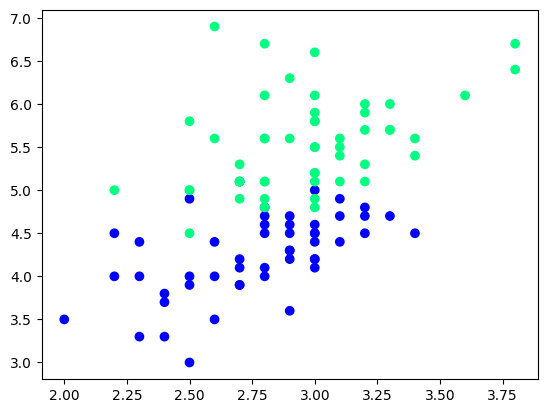

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(final_dataset['SepalWidthCm'],final_dataset['PetalLengthCm'],c=final_dataset['Species'],cmap='winter')

### Choose randomly selected 10 rows for training dataset.

In [14]:
# Taking only 10 rows for training
df = final_dataset.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [15]:
df_train

,SepalWidthCm,PetalLengthCm,Species
118,2.6,6.9,2
80,2.4,3.8,1
130,2.8,6.1,2
77,3.0,5.0,1
53,2.3,4.0,1
93,2.3,3.3,1
88,3.0,4.1,1
68,2.2,4.5,1
56,3.3,4.7,1
129,3.0,5.8,2


In [16]:
df_val

,SepalWidthCm,PetalLengthCm,Species
97,2.9,4.3,1
128,2.8,5.6,2
135,3.0,6.1,2
71,2.8,4.0,1
82,2.7,3.9,1


In [17]:
df_test

,SepalWidthCm,PetalLengthCm,Species
65,3.1,4.4,1
83,2.7,5.1,1
76,2.8,4.8,1
64,2.9,3.6,1
137,3.1,5.5,2


In [18]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [19]:
y_test


array([1, 2, 2, 1, 1])

## Bagging Case 1

### For Bag 1

In [ ]:
# Data with replacement(row can be repeated) for Tree 1 
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
118,2.6,6.9,2
88,3.0,4.1,1
77,3.0,5.0,1
56,3.3,4.7,1
118,2.6,6.9,2
88,3.0,4.1,1
77,3.0,5.0,1
53,2.3,4.0,1


In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [23]:
# Train
dt_bag1 = DecisionTreeClassifier()
dt_bag1.fit(X, y)

# Evaluate
y_pred = dt_bag1.predict(X)
print("Accuracy:", accuracy_score(y, y_pred))

Accuracy: 1.0


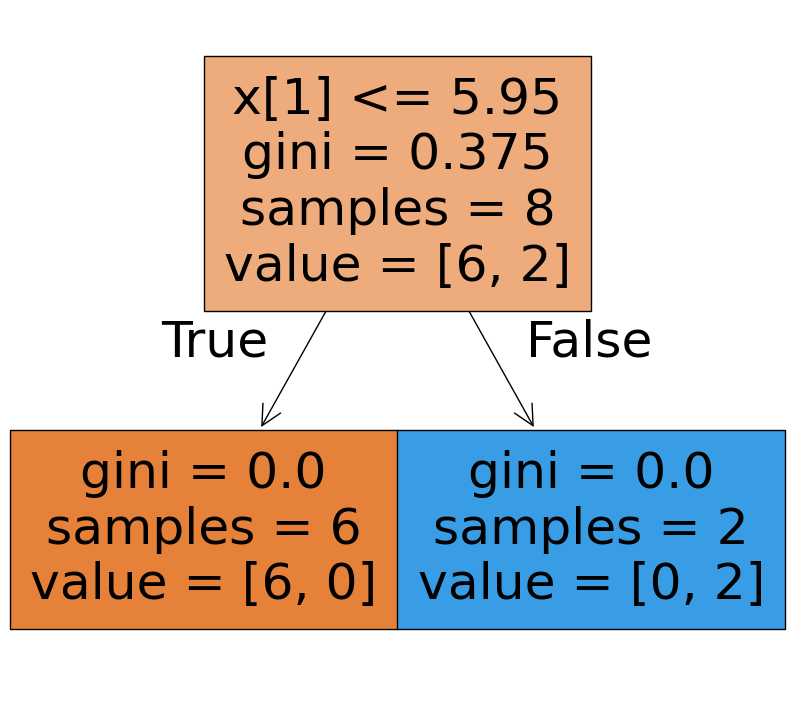

In [27]:
# Visualize tree
plt.figure(figsize=(10,9))
plot_tree(dt_bag1, filled=True)
plt.show()

### For Bag 2

In [28]:
# Data for Tree 2 taking 8 rows with replacement
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
80,2.4,3.8,1
130,2.8,6.1,2
88,3.0,4.1,1
80,2.4,3.8,1
53,2.3,4.0,1
77,3.0,5.0,1
80,2.4,3.8,1
53,2.3,4.0,1


In [29]:
# Train bag 2
dt_bag2 = DecisionTreeClassifier()
dt_bag2.fit(X, y)

# Evaluate
y_pred = dt_bag2.predict(X)
print("Accuracy:", accuracy_score(y, y_pred))

Accuracy: 1.0


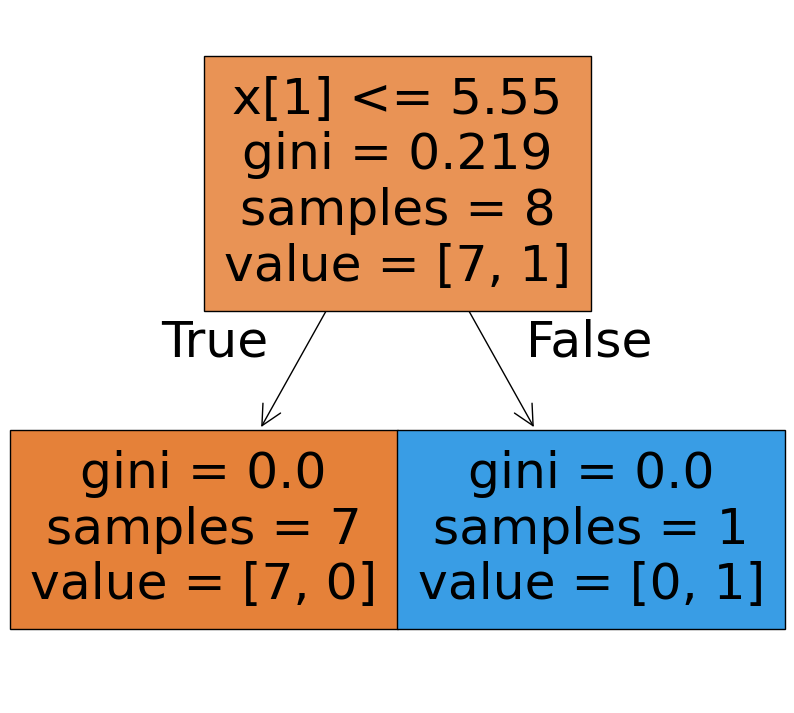

In [30]:
# Visualize tree
plt.figure(figsize=(10,9))
plot_tree(dt_bag2, filled=True)
plt.show()

### For Bag 3

In [31]:
# Data for Tree 3 taking 8 rows with replacement
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
130,2.8,6.1,2
118,2.6,6.9,2
118,2.6,6.9,2
53,2.3,4.0,1
118,2.6,6.9,2
77,3.0,5.0,1
68,2.2,4.5,1
56,3.3,4.7,1


In [32]:
# Train bag 3
dt_bag3 = DecisionTreeClassifier()
dt_bag3.fit(X, y)

# Evaluate
y_pred = dt_bag3.predict(X)
print("Accuracy:", accuracy_score(y, y_pred))

Accuracy: 1.0


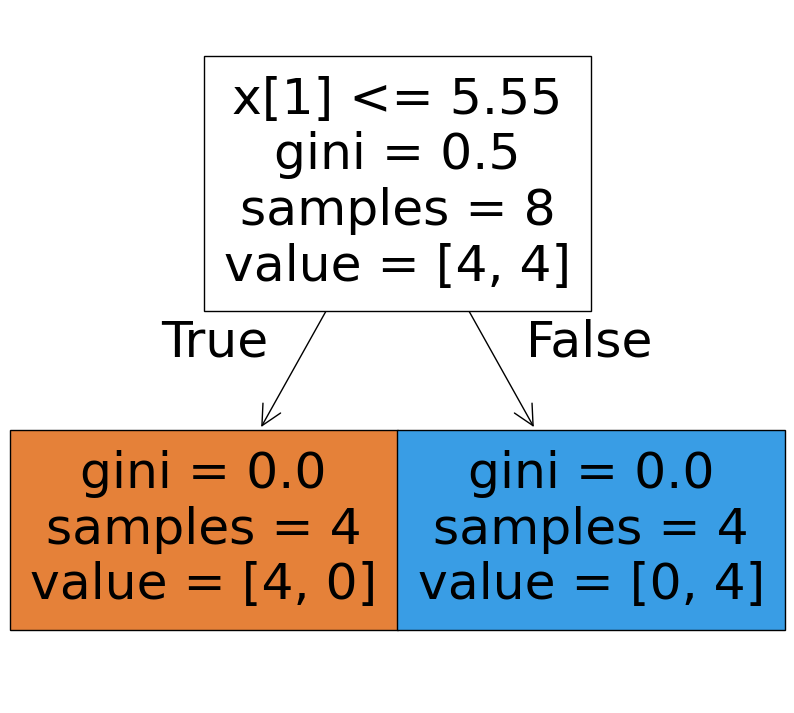

In [33]:
# Visualize tree
plt.figure(figsize=(10,9))
plot_tree(dt_bag3, filled=True)
plt.show()

## Model Evaluation on Testing data

In [35]:
df_test

,SepalWidthCm,PetalLengthCm,Species
65,3.1,4.4,1
83,2.7,5.1,1
76,2.8,4.8,1
64,2.9,3.6,1
137,3.1,5.5,2


In [37]:
print("Predictor 1",dt_bag1.predict(numpy.array([3.1, 4.4]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(numpy.array([3.1, 4.4]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(numpy.array([3.1, 4.4]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Pasting 

### In pasting we do Row sampling `without replacement` mean all unique rows `no duplication`.

In [38]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
118,2.6,6.9,2
80,2.4,3.8,1
130,2.8,6.1,2
77,3.0,5.0,1
53,2.3,4.0,1
93,2.3,3.3,1
88,3.0,4.1,1
68,2.2,4.5,1
56,3.3,4.7,1
129,3.0,5.8,2


In [39]:
df_train.sample(8,replace=False)

,SepalWidthCm,PetalLengthCm,Species
80,2.4,3.8,1
56,3.3,4.7,1
129,3.0,5.8,2
93,2.3,3.3,1
77,3.0,5.0,1
53,2.3,4.0,1
68,2.2,4.5,1
88,3.0,4.1,1


## Random Subspaces

### In random subspaces we do `column sampling` with or without replacement.

In [41]:
df_rs = dataset.sample(10)
df_rs

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,1
93,5.0,2.3,3.3,1.0,1
21,5.1,3.7,1.5,0.4,0
148,6.2,3.4,5.4,2.3,2
91,6.1,3.0,4.6,1.4,1
118,7.7,2.6,6.9,2.3,2
3,4.6,3.1,1.5,0.2,0
87,6.3,2.3,4.4,1.3,1
0,5.1,3.5,1.4,0.2,0
58,6.6,2.9,4.6,1.3,1


In [48]:
df_rs.sample(2,replace=True,axis=1)

,Species,PetalWidthCm
50,1,1.4
93,1,1.0
21,0,0.4
148,2,2.3
91,1,1.4
118,2,2.3
3,0,0.2
87,1,1.3
0,0,0.2
58,1,1.3


## Random Patches

### In random patches we can do `both row and column` sampling.

In [49]:
df_rp = dataset.sample(10)
df_rp

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
94,5.6,2.7,4.2,1.3,1
135,7.7,3.0,6.1,2.3,2
8,4.4,2.9,1.4,0.2,0
41,4.5,2.3,1.3,0.3,0
148,6.2,3.4,5.4,2.3,2
3,4.6,3.1,1.5,0.2,0
91,6.1,3.0,4.6,1.4,1
21,5.1,3.7,1.5,0.4,0
127,6.1,3.0,4.9,1.8,2
1,4.9,3.0,1.4,0.2,0


In [51]:
df_rp.sample(8,replace=True).sample(2,replace=False,axis=1)

,SepalLengthCm,PetalLengthCm
8,4.4,1.4
21,5.1,1.5
41,4.5,1.3
8,4.4,1.4
3,4.6,1.5
148,6.2,5.4
91,6.1,4.6
94,5.6,4.2
